In [21]:
'''This is just a shell, need to configure more sophisticated nn'''
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import torch.nn as nn
import torch
device = "cpu"

i = rd.randint(0, 9999)
data = np.load('sim_data.npy')
print(data.shape)
print(i)

(10000, 2, 32, 1024)
6313


In [22]:
num_epochs = 25
batch_size = 32
learning_rate = 1e-3
num_examples = 10000

In [23]:
X, Y = data[:, 0], data[:, 1]
print(X.shape, Y.shape)
X_train, Y_train, X_test, Y_test = X[:8000], Y[:8000], X[8000:], Y[8000:]

(10000, 32, 1024) (10000, 32, 1024)


In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.stack = nn.Sequential(
            nn.Conv1d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 32, kernel_size=3, padding=1),
        )

    def forward(self, x):
        x = self.stack(x)
        return x.squeeze(1)

model = Net()

loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        batch_X = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32).to(device)
        batch_Y = torch.tensor(Y_train[i:i+batch_size], dtype=torch.float32).to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        l = loss(outputs, batch_Y)
        l.backward()
        optimizer.step()

        total_loss += l.item() 
    print(f"Epoch {epoch+1}, Loss: {total_loss / (len(X) // batch_size)}")

Epoch 1, Loss: 0.05060303125393171
Epoch 2, Loss: 0.0034804395452225343
Epoch 3, Loss: 0.002466521144528181
Epoch 4, Loss: 0.0020707455431618607
Epoch 5, Loss: 0.001870297194751075
Epoch 6, Loss: 0.0017387380115299795
Epoch 7, Loss: 0.0016406170877580268
Epoch 8, Loss: 0.0015638957381433544
Epoch 9, Loss: 0.001499819469291908
Epoch 10, Loss: 0.0014435272206379196
Epoch 11, Loss: 0.001392895474101608
Epoch 12, Loss: 0.0013505452904306974
Epoch 13, Loss: 0.001315960808707855
Epoch 14, Loss: 0.0012847279645845843
Epoch 15, Loss: 0.0012526367061535637
Epoch 16, Loss: 0.0012220705899287565
Epoch 17, Loss: 0.0011939115352922669
Epoch 18, Loss: 0.00116973320426694
Epoch 19, Loss: 0.001148738088280273
Epoch 20, Loss: 0.001131709282419298
Epoch 21, Loss: 0.0011183919445895113
Epoch 22, Loss: 0.0011082289767308305
Epoch 23, Loss: 0.0010993267869940982
Epoch 24, Loss: 0.001092548494619759
Epoch 25, Loss: 0.0010854581224311215


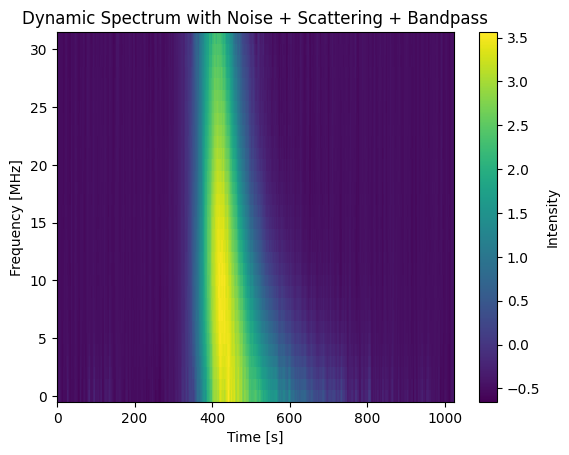

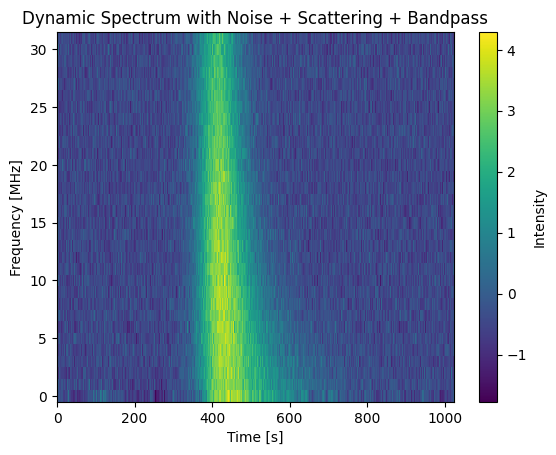

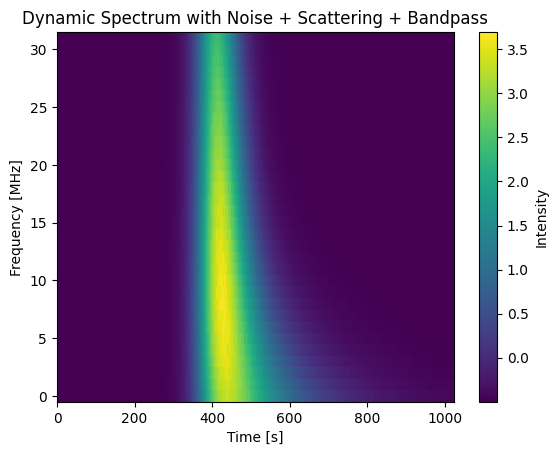

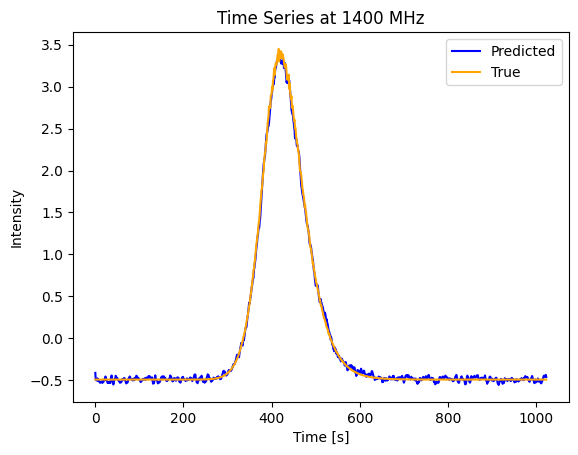

In [36]:
test_index = 4

example = model(torch.tensor(X_test[test_index:test_index + 1], dtype=torch.float32).to(device)).detach().numpy()

plt.imshow(example[0], aspect='auto', interpolation='nearest', origin='lower')
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Intensity")
plt.title("Dynamic Spectrum with Noise + Scattering + Bandpass")
plt.show()
plt.imshow(X_test[test_index], aspect='auto', interpolation='nearest', origin='lower')
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Intensity")
plt.title("Dynamic Spectrum with Noise + Scattering + Bandpass")
plt.show()
plt.imshow(Y_test[test_index], aspect='auto', interpolation='nearest', origin='lower')
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Intensity")
plt.title("Dynamic Spectrum with Noise + Scattering + Bandpass")
plt.show()
plt.plot(example[0, 16, :], label='Predicted', color='blue')
plt.plot(Y_test[test_index, 16, :], label='True', color='orange')
plt.xlabel("Time [s]")
plt.ylabel("Intensity")
plt.title("Time Series at 1400 MHz")
plt.legend()
plt.show()